# ***Import Libraries***

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from typing import List, Tuple, Callable, Union
from data_augmentation import Geometric_Augmentations
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import Tensor
from tensorflow.keras.applications import MobileNetV2
import keras.backend as Kb

In [44]:
PATH = './DataSet/Fish_Dataset'
labels = [entry.name for entry in os.scandir(PATH) if entry.is_dir()]
labels

['Black Sea Sprat',
 'Gilt-Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [45]:
fish_id = [id.name for id in os.scandir(f'{PATH}/{labels[0]}/{labels[0]}')]
fish_id

['00001.png',
 '00002.png',
 '00003.png',
 '00004.png',
 '00005.png',
 '00006.png',
 '00007.png',
 '00008.png',
 '00009.png',
 '00010.png',
 '00011.png',
 '00012.png',
 '00013.png',
 '00014.png',
 '00015.png',
 '00016.png',
 '00017.png',
 '00018.png',
 '00019.png',
 '00020.png',
 '00021.png',
 '00022.png',
 '00023.png',
 '00024.png',
 '00025.png',
 '00026.png',
 '00027.png',
 '00028.png',
 '00029.png',
 '00030.png',
 '00031.png',
 '00032.png',
 '00033.png',
 '00034.png',
 '00035.png',
 '00036.png',
 '00037.png',
 '00038.png',
 '00039.png',
 '00040.png',
 '00041.png',
 '00042.png',
 '00043.png',
 '00044.png',
 '00045.png',
 '00046.png',
 '00047.png',
 '00048.png',
 '00049.png',
 '00050.png',
 '00051.png',
 '00052.png',
 '00053.png',
 '00054.png',
 '00055.png',
 '00056.png',
 '00057.png',
 '00058.png',
 '00059.png',
 '00060.png',
 '00061.png',
 '00062.png',
 '00063.png',
 '00064.png',
 '00065.png',
 '00066.png',
 '00067.png',
 '00068.png',
 '00069.png',
 '00070.png',
 '00071.png',
 '0007

In [46]:
def plot_image(image_path: str, mask_path:str, scale:float = 1.3) -> None:
    """
    Display an image from the given file path using OpenCV and Matplotlib.

    Args:
        image_path (str): The path to the image file.
        mask_path (str): The path to the mask file.
        scale (float): Scaling factor for the figure size (default is 1.3).

    Returns:
        None

    Raises:
        FileNotFoundError: If the image or mask file is not found.
        Exception: If there is an issue loading the image or mask.
    """
    try:
        # Load the image and mask
        image = plt.imread(image_path)
        mask = plt.imread(mask_path)
    except FileNotFoundError as e:
        raise FileNotFoundError(f"File not found: {str(e)}")
    except Exception as e:
        raise Exception(f"An error occurred while loading the image or mask: {str(e)}")
    
    # Adjust the figure size based on the scale parameter
    fig_width, fig_height = plt.gcf().get_size_inches()
    plt.figure(figsize=(fig_width * scale, fig_height * scale))

    # Create a subplot with two columns for the image and mask
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Mask")
    plt.axis('off')

    plt.show()


In [47]:
def get_images_path(base_path: str, labels_list: List[str], ids_list: List[str]) -> Tuple[List[str], List[str], List[str]]:
    """
    Generate lists of image and mask file paths along with corresponding labels.

    Args:
        base_path (str): The base directory containing subdirectories for labels.
        labels_list (List[str]): List of label names (directory names).
        ids_list (List[str]): List of image file names within each label directory.

    Returns:
        Tuple[List[str], List[str], List[str]]: A tuple containing lists of image file paths,
        mask file paths, and corresponding labels.
    """
    images_path = []
    masks_path = []
    labels = []

    for label in labels_list:
        for id in ids_list:
            image_path = f"{base_path}/{label}/{label}/{id}"
            mask_path = f"{base_path}/{label}/{label} GT/{id}"
            
            images_path.append(image_path)
            masks_path.append(mask_path)
            labels.append(label)

    return images_path, masks_path, labels

In [48]:
images_path, masks_path, labels = get_images_path(PATH, labels, fish_id)

data = {
    'label': labels,
    'image_path': images_path,
    'mask_path': masks_path
}

dataframe = pd.DataFrame(data)


In [49]:
display(dataframe)

,label,image_path,mask_path
0,Black Sea Sprat,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...
1,Black Sea Sprat,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...
2,Black Sea Sprat,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...
3,Black Sea Sprat,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...
4,Black Sea Sprat,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...
...,...,...,...
8995,Trout,./DataSet/Fish_Dataset/Trout/Trout/00996.png,./DataSet/Fish_Dataset/Trout/Trout GT/00996.png
8996,Trout,./DataSet/Fish_Dataset/Trout/Trout/00997.png,./DataSet/Fish_Dataset/Trout/Trout GT/00997.png
8997,Trout,./DataSet/Fish_Dataset/Trout/Trout/00998.png,./DataSet/Fish_Dataset/Trout/Trout GT/00998.png
8998,Trout,./DataSet/Fish_Dataset/Trout/Trout/00999.png,./DataSet/Fish_Dataset/Trout/Trout GT/00999.png


<Figure size 640x480 with 0 Axes>

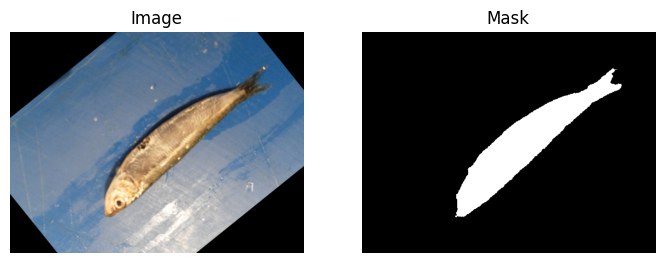

In [50]:
i = 10
image_path = dataframe.loc[10, 'image_path']
mask_path = dataframe.loc[10, 'mask_path']
plot_image(image_path, mask_path)

In [51]:
TARGET_SIZE = [256,256]

In [52]:
def preprocess_image_and_mask(image_path: str, mask_path: str, target_size: tuple) -> Tuple[Tensor, Tensor]:
    """
    Preprocess an image and its corresponding mask for a segmentation task.

    Args:
        image_path (str): Path to the input image file.
        mask_path (str): Path to the mask image file.
        target_size (tuple): A tuple (height, width) specifying the target size for resizing.

    Returns:
        Tuple[Tensor, Tensor]: A tuple containing preprocessed image and mask tensors.
            - Preprocessed image tensor with shape (height, width, 3).
            - Preprocessed mask tensor with shape (height, width, 1).
    """
    
    # Read and decode the input image
    image_data = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image_data, channels=3)

    # Read and decode the mask image
    mask_data = tf.io.read_file(mask_path)
    mask = tf.image.decode_jpeg(mask_data, channels=1)

    # Resize the image and mask to the target size
    image = tf.image.resize(image, target_size)
    mask = tf.image.resize(mask, target_size)

    # Normalize the image to the range [0, 1]
    image = tf.cast(image, tf.float32) / 255.0

    # Binarize the mask
    mask = tf.math.sign(mask)

    return image, mask


In [53]:
def create_dataset(dataframe: pd.DataFrame,
                   preprocess_functions: Callable[[str, str, Tuple[int, int]], Tuple[tf.Tensor, tf.Tensor]],
                   data_augmentation_funciton: Callable[[tf.Tensor, tf.Tensor, float], Tuple[tf.Tensor, tf.Tensor]],
                   train: bool = False) -> tf.data.Dataset:
    """
    Create a TensorFlow dataset for image segmentation tasks.

    Args:
        dataframe (pd.DataFrame): A pandas DataFrame with columns 'image_path' and 'mask_path' containing file paths.
        preprocess_functions (callable): A function for preprocessing image and mask pairs.
        data_augmentation_funciton (callable): A function for data augmentation.
            This function will be applied to the dataset elements.
        train (bool, optional): Whether to apply data augmentation for training.

    Returns:
        tf.data.Dataset: A TensorFlow dataset containing preprocessed image and mask pairs.
    """
    
    # Extract image and mask file paths from the DataFrame
    image_paths = dataframe["image_path"].values
    mask_paths = dataframe["mask_path"].values

    # Create a dataset of image and mask file paths
    df = tf.data.Dataset.from_tensor_slices((image_paths, mask_paths))

    # Map the preprocessing function to each element and optimize parallelism
    df = df.map(lambda image_path, mask_path: preprocess_image_and_mask(image_path, mask_path, TARGET_SIZE), num_parallel_calls=tf.data.AUTOTUNE)

    # Apply data augmentation for training dataset
    if train:
        df = df.map(lambda image_path, mask_path:data_augmentation_funciton(image_path, mask_path), num_parallel_calls=tf.data.AUTOTUNE)

    return df


In [54]:
data = dataframe[['image_path', 'mask_path']]
target = dataframe['label']

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [55]:
x_train = create_dataset(x_train, preprocess_image_and_mask, Geometric_Augmentations.horizontal_flip, train=True)
x_validation = create_dataset(x_validation, preprocess_image_and_mask, Geometric_Augmentations.horizontal_flip)
x_test = create_dataset(x_test, preprocess_image_and_mask, Geometric_Augmentations.horizontal_flip)

In [56]:
x = iter(x_train)
x = next(x)

In [57]:
TRAIN_DATASET_LENGH = len(x_train)
BATCH_SIZE = 16
BUFFER_SIZE = 1024

In [58]:
x_train = x_train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()   
x_train = x_train.prefetch(buffer_size=tf.data.AUTOTUNE)
x_validation = x_validation.batch(BATCH_SIZE)
x_test = x_test.batch(BATCH_SIZE)


In [59]:
# Create an iterator for the dataset
train_iterator = iter(x_train)

In [60]:
# Get the first element
first_element = next(train_iterator)

In [61]:
first_element[0][0].shape

TensorShape([256, 256, 3])

In [62]:
def plot_image_with_mask(image: Union[np.ndarray, tf.Tensor], mask: Union[np.ndarray, tf.Tensor]) -> None:
    """
    Plot an image alongside its corresponding mask.

    Parameters:
    image (numpy.ndarray or tensorflow.Tensor): The input image as a NumPy array or TensorFlow tensor.
    mask (numpy.ndarray or tensorflow.Tensor): The mask image as a NumPy array or TensorFlow tensor.

    Raises:
    ValueError: If the dimensions of the image and mask do not match.

    Returns:
    None
    """
 
    if not isinstance(image, (np.ndarray, tf.Tensor)):
        raise TypeError("The 'image' should be a NumPy array or TensorFlow tensor.")
    
    if not isinstance(mask, (np.ndarray, tf.Tensor)):
        raise TypeError("The 'mask' should be a NumPy array or TensorFlow tensor.")
    
    if image.shape[:2] != mask.shape[:2]:
        raise ValueError("The dimensions of the image and mask must match in height and width.")
   
    # convert image to numpy array
    if isinstance(image, tf.Tensor):
        image = image.numpy()
    if isinstance(mask, tf.Tensor):
        mask = mask.numpy()

    if image.shape[-1] == 1:
        image = image[:, :, 0] 

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
    plt.title("Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mask[:, :, 0], cmap='gray')
    plt.title("Mask")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


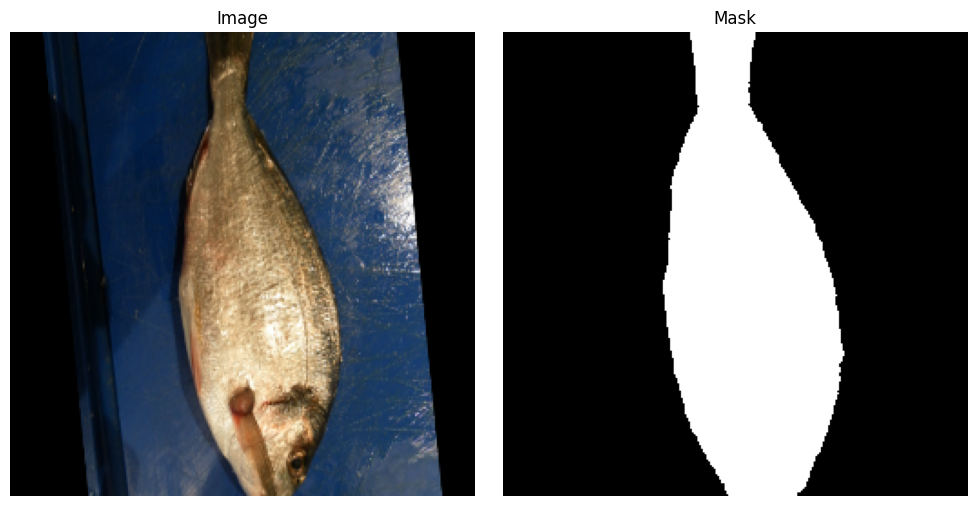

In [63]:
plot_image_with_mask(first_element[0][0], first_element[1][0])

In [64]:
base_model = MobileNetV2(input_shape=(256, 256, 3), include_top=False)
print(base_model.summary())

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 128, 32)         864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 128, 128, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 128, 128, 32)         0         ['bn_Conv1[

In [65]:
# get specific features maps
layer_names = [
    'block_1_expand_relu',   
    'block_3_expand_relu',   
    'block_6_expand_relu',   
    'block_13_expand_relu',  
    'block_16_project',      
]

In [66]:
for layer_name in layer_names:
    layer = base_model.get_layer(layer_name)
    input_shape = layer.input_shape
    output_shape = layer.output_shape
    print(f'the input shape of {layer_name} is {input_shape} and output shape is {output_shape}')

the input shape of block_1_expand_relu is (None, 128, 128, 96) and output shape is (None, 128, 128, 96)
the input shape of block_3_expand_relu is (None, 64, 64, 144) and output shape is (None, 64, 64, 144)
the input shape of block_6_expand_relu is (None, 32, 32, 192) and output shape is (None, 32, 32, 192)
the input shape of block_13_expand_relu is (None, 16, 16, 576) and output shape is (None, 16, 16, 576)
the input shape of block_16_project is (None, 8, 8, 960) and output shape is (None, 8, 8, 320)


In [67]:
def visualize_layer_feature_map(layer_name: str, base_model: tf.keras.Model, image_path: str) -> None:
    """
    Visualizes the output feature map of a specific layer in a given base model using an input image.

    Args:
        layer_name (str): Name of the layer in the base model whose feature map you want to visualize.
        base_model (tf.keras.Model): The base model with pre-trained weights.
        image_path (str): Path to the input image for feature map visualization.

    Returns:
        None: This function displays the feature map using Matplotlib.

    Example usage:
    >>> layer_name = 'layer_name'
    >>> image_path = 'example_image.jpg'
    >>> base_model = tf.keras.applications.MobileNetV2(input_shape=(256, 256, 3), include_top=False)
    >>> visualize_layer_feature_map(layer_name, base_model, image_path)
    """
    
    # Check if the specified layer exists in the base model
    if layer_name not in [layer.name for layer in base_model.layers]:
        raise ValueError(f"Layer '{layer_name}' not found in the base model.")

    try:
        # Get the specified layer by name
        layer = base_model.get_layer(layer_name)

        # Create a submodel that takes the input of the original model and outputs from the specified layer
        feature_map_model = tf.keras.Model(inputs=base_model.input, outputs=layer.output)

        # Load an image, preprocess it, and add a batch dimension
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
        image = tf.keras.preprocessing.image.img_to_array(image)
        image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
        image = tf.expand_dims(image, axis=0)  # Add batch dimension

        # Get the feature map
        feature_maps = feature_map_model.predict(image)
        num_feature_maps = feature_maps.shape[3]

        # Calculate the number of rows and columns for subplots
        rows = int(num_feature_maps**0.5)
        cols = num_feature_maps // rows + 1

        # Plot the feature maps
        plt.figure(figsize=(10, 10))
        for i in range(num_feature_maps):
            plt.subplot(rows, cols, i + 1)
            plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
            plt.axis('off')
        plt.show()
    
    except Exception as e:
        # Handle any exceptions that might occur during image loading or feature map visualization
        print(f"An error occurred: {str(e)}")



1/1 [==============================] - 0s 151ms/step


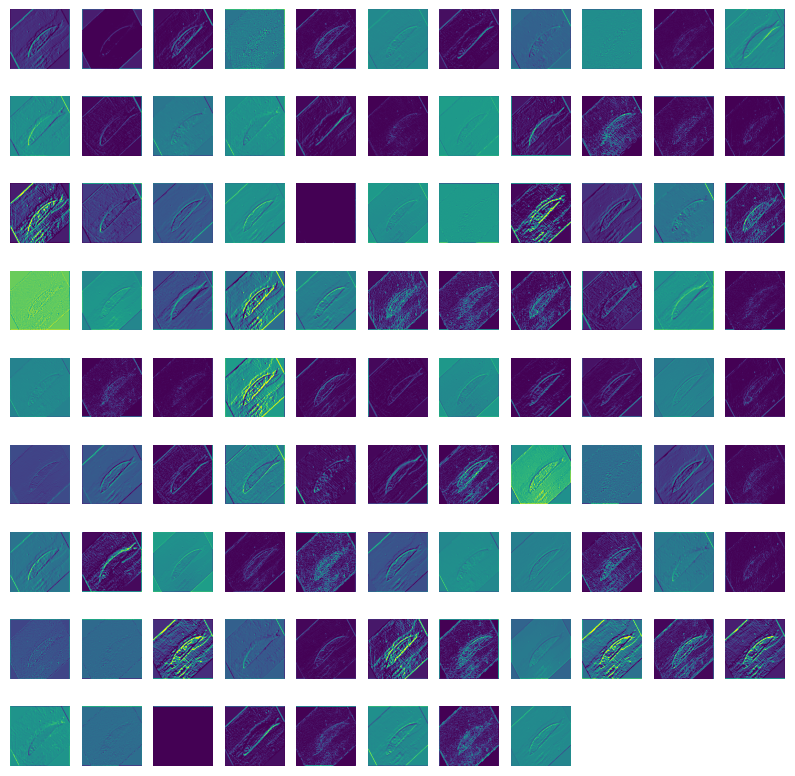

In [68]:
image_path = './DataSet/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00001.png'
visualize_layer_feature_map(layer_names[0], base_model, image_path)

In [69]:
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]
base_model_outputs

[<KerasTensor: shape=(None, 128, 128, 96) dtype=float32 (created by layer 'block_1_expand_relu')>,
 <KerasTensor: shape=(None, 64, 64, 144) dtype=float32 (created by layer 'block_3_expand_relu')>,
 <KerasTensor: shape=(None, 32, 32, 192) dtype=float32 (created by layer 'block_6_expand_relu')>,
 <KerasTensor: shape=(None, 16, 16, 576) dtype=float32 (created by layer 'block_13_expand_relu')>,
 <KerasTensor: shape=(None, 8, 8, 320) dtype=float32 (created by layer 'block_16_project')>]

In [70]:
feature_extraction_model = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)
feature_extraction_model.trainable = False
# feature_extraction_model have multiple outputs corresponding to the name of the base model_outputs

In [71]:
# decoder function
def upsample(filters: int, size: int, norm_type: str = 'batchnorm', apply_dropout: bool = False,
             activation: str = 'relu', dropout_rate: float = 0.5, weight_initializer: str = 'random_normal') -> tf.keras.Sequential:

    """
    Create an upsampling layer for a neural network.

    Args:
        filters (int): The number of filters (channels) in the Conv2DTranspose layer.
        size (int): The kernel size for the Conv2DTranspose layer, determining the upsampling factor.
        norm_type (str, optional): Type of normalization layer ('batchnorm' or 'instancenorm'). Default is 'batchnorm'.
        apply_dropout (bool, optional): Whether to apply dropout after the upsampling operation. Default is False.
        activation (str, optional): Activation function to apply after dropout (e.g., 'relu', 'sigmoid', 'tanh'). Default is 'relu'.
        dropout_rate (float, optional): Dropout rate to use if apply_dropout is True. Default is 0.5.
        weight_initializer (str, optional): Weight initialization method (e.g., 'random_normal', 'glorot_uniform'). Default is 'random_normal'.

    Returns:
        tf.keras.Sequential: A sequential model representing the upsampling layer.

    Raises:
        ValueError: If an invalid argument is provided.
    """
    
    if not (isinstance(filters, int) and filters > 0):
        raise ValueError("Filters must be a positive integer.")

    if not (isinstance(size, int) and size > 0):
        raise ValueError("Size must be a positive integer.")

    if norm_type.lower() not in ('batchnorm', 'instancenorm'):
        raise ValueError("Invalid normalization type. Use 'batchnorm' or 'instancenorm'.")

    if not isinstance(apply_dropout, bool):
        raise ValueError("apply_dropout must be a boolean value.")

    if not (isinstance(dropout_rate, float) and 0 <= dropout_rate <= 1):
        raise ValueError("Dropout rate must be a float between 0 and 1.")

    if activation not in ('relu', 'sigmoid', 'tanh'):
        raise ValueError("Invalid activation function. Use 'relu', 'sigmoid', or 'tanh'.")

    if weight_initializer not in ('random_normal', 'glorot_uniform'):
        raise ValueError("Invalid weight initializer. Use 'random_normal' or 'glorot_uniform'.")

    if weight_initializer == 'random_normal':
        initializer = tf.initializers.RandomNormal(mean=0.0, stddev=0.02)
    elif weight_initializer == 'glorot_uniform':
        initializer = 'glorot_uniform'
        
    # Create a sequential model for the upsampling layer
    result = tf.keras.Sequential()
    
    result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))
    
    # Add normalization layer (batchnorm or instancenorm) based on norm_type
    if norm_type.lower() == 'batchnorm':
        result.add(tf.keras.layers.BatchNormalization())
    elif norm_type.lower() == 'instancenorm':
        result.add(tf.keras.layers.LayerNormalization()) 

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(dropout_rate))
        if activation == 'relu':
            result.add(tf.keras.layers.ReLU())
        elif activation == 'sigmoid':
            result.add(tf.keras.layers.Activation('sigmoid'))
        elif activation == 'tanh':
            result.add(tf.keras.layers.Activation('tanh'))
        
    return result

In [72]:
decoder = [
    upsample(512, 3),  
    upsample(256, 3),  
    upsample(128, 3),  
    upsample(64, 3),   
]

In [74]:
def create_unet_segmentation_model(num_output_channels: int) -> tf.keras.Model:
    """
    Create a U-Net model for image segmentation.

    Args:
        num_output_channels (int): Number of output channels, typically the number of classes for segmentation.

    Returns:
        tf.keras.Model: U-Net model for image segmentation.
    """

    # Ensure the input dimensions are 256x256x3
    expected_input_shape = (256, 256, 3)
      
    # Define the input layer
    input_layer = tf.keras.layers.Input(shape=expected_input_shape)

    # Downsampling through the feature extraction model
    feature_maps = feature_extraction_model(input_layer)
    downsampled_features = feature_maps[-1]
    downsampled_features_list = reversed(feature_maps[:-1])

    for upsample_layer, skip_features in zip(decoder, downsampled_features_list):
        x = downsampled_features
        x = upsample_layer(x)
        concatenation_layer = tf.keras.layers.Concatenate()
        x = concatenation_layer([x, skip_features])

    # Final segmentation layer
    segmentation_layer = tf.keras.layers.Conv2DTranspose(
        num_output_channels, 3, strides=2, activation='sigmoid', padding='same')  # 64x64 -> 128x128
    
    x = segmentation_layer(x)
    unet_model = tf.keras.Model(inputs=input_layer, outputs=x)
    
    return unet_model

In [75]:
def dice_coefficient(y_true: tf.Tensor, y_pred: tf.Tensor, smooth: float = 1.0) -> tf.Tensor:
    """
    Calculate the Dice coefficient for binary segmentation masks.

    The Dice coefficient measures the similarity between two binary masks, typically the ground truth (y_true) and the
    predicted segmentation mask (y_pred).

    Args:
        y_true (tf.Tensor): Ground truth binary mask (0 or 1).
        y_pred (tf.Tensor): Predicted binary mask (0 or 1).
        smooth (float, optional): Smoothing factor to prevent division by zero. Default is 1.0.

    Returns:
        tf.Tensor: Dice coefficient value, a float between 0 and 1. Higher values indicate better similarity.

    Raises:
        ValueError: If the shapes of y_true and y_pred do not match.

    Example:
        dice = dice_coefficient(y_true, y_pred)
    """
    # Ensure that the shapes of y_true and y_pred match
    if y_true.shape != y_pred.shape:
        raise ValueError("Shapes of y_true and y_pred must match.")

    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3])
    
    dice = tf.reduce_mean((2. * intersection + smooth) / (union + smooth), axis=0)
    return dice
